<a href="https://colab.research.google.com/github/gustavoslemos/ML-DeepLearningstuds/blob/main/An%C3%A1lise_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Projetos/Projetos Portfólio/Modelos Preditivos Python'

/content/drive/MyDrive/Projetos/Projetos Portfólio/Modelos Preditivos Python


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [ ]:
# numero de colunas
df.shape

(7043, 21)

In [ ]:
# mostrar todas as colunas
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#saber os valores "missing" do modelo
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# trazer dados estatisticos da base de dados
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#valores de churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

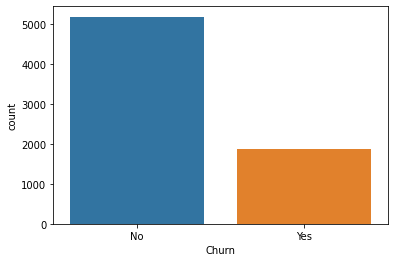

In [ ]:
#plotar valores de churn
sns.countplot(df['Churn'])

In [ ]:
#qual o percentual de pessoas saindo ?
num_retained = df[df.Churn == 'No'].shape[0]
num_churned = df[df.Churn == 'Yes'].shape[0]

#imprimir valor de pessoas que ficaram
print (num_retained / (num_retained + num_churned) * 100, '% of customers stayed with the company.')


#imprimir valor de pessoas que sairam
print (num_churned / (num_retained + num_churned) * 100, '% of customers left with the company.')

73.4630129206304 % of customers stayed with the company.
26.536987079369588 % of customers left with the company.


<AxesSubplot:xlabel='gender', ylabel='count'>

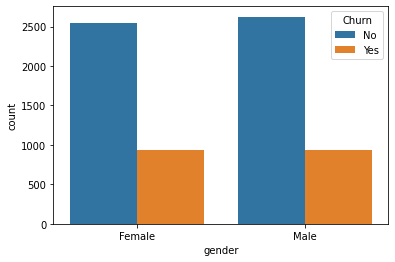

In [ ]:
#numero de churn por genero
sns.countplot(x='gender', hue='Churn', data = df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

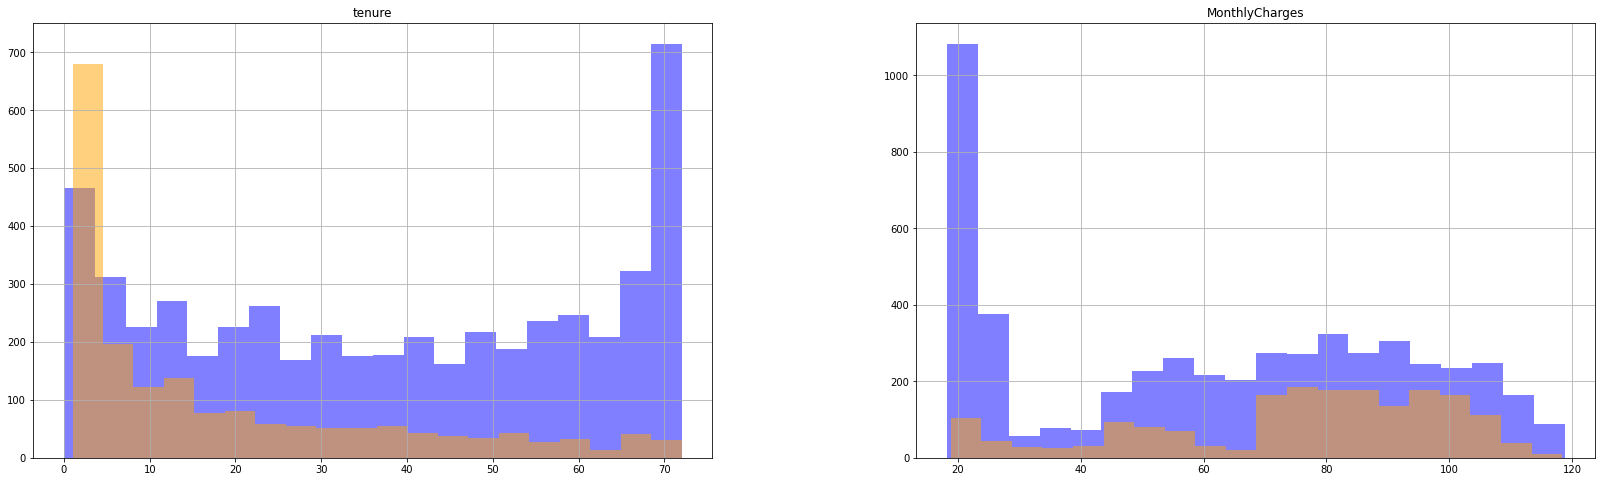

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax = ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax = ax)

In [ ]:
#remover colunas desnecessárias
cleaned_df = df.drop ('customerID', axis = 1)

In [ ]:
#converter todas as colunas para númerico
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number:
    continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

<ipython-input-36-283d06214faf>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:


In [ ]:
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
#escalar dados
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']

X = StandardScaler().fit_transform(X)

In [ ]:
#dividir modelo de ml 80%/20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#criar modelo

model = LogisticRegression()

#treinar modelo
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#criar predições do modelo
predictions = model.predict(x_test)

#imprimir predições
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:
#checar os valores de precisão do modelo

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
# adiciona as colunas de previsões e dados reais ao DataFrame de teste
test_df = pd.DataFrame(x_test, columns=cleaned_df.drop('Churn', axis=1).columns)
test_df['Churn_Prediction'] = predictions
test_df['Churn_Actual'] = y_test.values

# seleciona as empresas que o modelo previu corretamente
correct_predictions = test_df[test_df['Churn_Prediction'] == test_df['Churn_Actual']]
print("Empresas que o modelo previu corretamente:")
print(correct_predictions[['tenure', 'MonthlyCharges', 'Churn_Actual', 'Churn_Prediction']])

# seleciona as empresas que o modelo previu incorretamente
incorrect_predictions = test_df[test_df['Churn_Prediction'] != test_df['Churn_Actual']]
print("Empresas que o modelo previu incorretamente:")
print(incorrect_predictions[['tenure', 'MonthlyCharges', 'Churn_Actual', 'Churn_Prediction']])


Empresas que o modelo previu corretamente:
        tenure  MonthlyCharges  Churn_Actual  Churn_Prediction
0    -1.277445       -1.328164             1                 1
1     0.351370       -1.313208             0                 0
2     0.799294       -1.509300             0                 0
3    -1.277445        0.385148             1                 1
4     1.410099       -0.472339             0                 0
...        ...             ...           ...               ...
1403  1.491540        1.611554             0                 0
1404  1.287938        0.117599             0                 0
1405  0.758574        1.505199             0                 0
1406 -0.625919       -1.491021             0                 0
1407  1.491540       -0.691696             0                 0

[1150 rows x 4 columns]
Empresas que o modelo previu incorretamente:
        tenure  MonthlyCharges  Churn_Actual  Churn_Prediction
5     1.450820        0.825524             1                 0
8    

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

